#PyTorch Custome Datasets

In [169]:
# Importing Libraries

# Torch Libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

# Python Data Libraries
import requests
import zipfile
from pathlib import Path
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List
from tqdm.auto import tqdm
from timeit import default_timer as timer
import pandas as pd

# Installing external packages
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary

torch.__version__

'2.0.1+cu118'

In [93]:
# Device Agnostic Code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##Get Data

* Creating a Download Path
* Downloading data

In [94]:
# Setup a data folder

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} directory does not exists, creating one!")
  image_path.mkdir(parents = True, exist_ok = True)

data/pizza_steak_sushi directory already exists


In [95]:
# Download Image Data

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading image data....")
  f.write(request.content)

 # Unzip data

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping the file....")
  zip_ref.extractall(image_path) 

Unzipping the file....


##Data Preparation

###Walk Through the directory

In [96]:
# Create a walk through function

def walk_through_dir(dir_path):
  """ Walks through the directory and returns its contents """
  
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [97]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [98]:
# Setup train and test paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

###Visualizing Imgaes

* Get all images
* Pick random image using random.choice()
* Get image class name using pathlib.Path.parent.stem
* Open image in Python PIL
* Show the image and print meta data

In [99]:
random.seed(42)

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image
random_image_path = random.choice(image_path_list)

# Get image class from path name
image_class = random_image_path.parent.stem

# Open Image
img = Image.open(random_image_path)

# Print image metadata
print(f"Random image path {random_image_path}")
print(f"Image class {image_class}")
print(f"Image height {img.height}")
print(f"Image width {img.width}")

Random image path data/pizza_steak_sushi/test/pizza/714866.jpg
Image class pizza
Image height 512
Image width 512


Text(0.5, 1.0, 'Image class: pizza | Image shape: (512, 512, 3)')

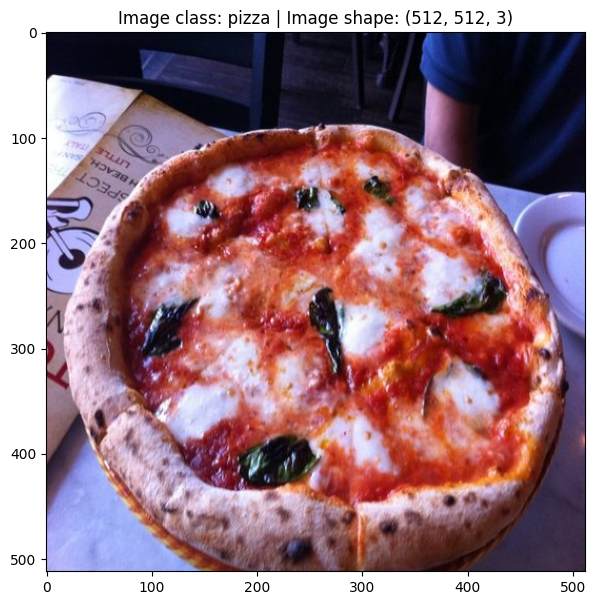

In [100]:
# Visualise using matplot lib

img_as_array = np.asarray(img)

plt.figure(figsize=(7,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")

###Convert images into tensors

* Converting images into tensors in the shape (C,H,W) format
* Turn it into Dataset
* Turn the dataset into data loaders

In [101]:
# Transforming data using torchvision.transforms

data_transform = transforms.Compose([
    # Resize Images to 64x64
    transforms.Resize(size=(64,64)),

    # Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),

    # Convert to torch tensor
    transforms.ToTensor()
])

In [102]:
data_transform(img)

tensor([[[0.0549, 0.0549, 0.0235,  ..., 0.0353, 0.0392, 0.0431],
         [0.0392, 0.0667, 0.0314,  ..., 0.0235, 0.0275, 0.0353],
         [0.0314, 0.0471, 0.0588,  ..., 0.0235, 0.0275, 0.0392],
         ...,
         [0.2275, 0.2314, 0.2392,  ..., 0.6902, 0.6902, 0.6824],
         [0.2392, 0.2392, 0.2431,  ..., 0.6902, 0.7059, 0.6980],
         [0.2314, 0.2392, 0.2510,  ..., 0.6980, 0.7137, 0.6941]],

        [[0.0941, 0.0863, 0.0353,  ..., 0.0392, 0.0431, 0.0353],
         [0.0588, 0.1059, 0.0549,  ..., 0.0314, 0.0314, 0.0314],
         [0.0353, 0.0824, 0.1020,  ..., 0.0314, 0.0353, 0.0314],
         ...,
         [0.1686, 0.1725, 0.1804,  ..., 0.7176, 0.7059, 0.6824],
         [0.1647, 0.1725, 0.1843,  ..., 0.7098, 0.7098, 0.6902],
         [0.1608, 0.1725, 0.1843,  ..., 0.7098, 0.7098, 0.6863]],

        [[0.2706, 0.2588, 0.1020,  ..., 0.1059, 0.1098, 0.1098],
         [0.1647, 0.3098, 0.1765,  ..., 0.1020, 0.1020, 0.1020],
         [0.0941, 0.2510, 0.2980,  ..., 0.0941, 0.0941, 0.

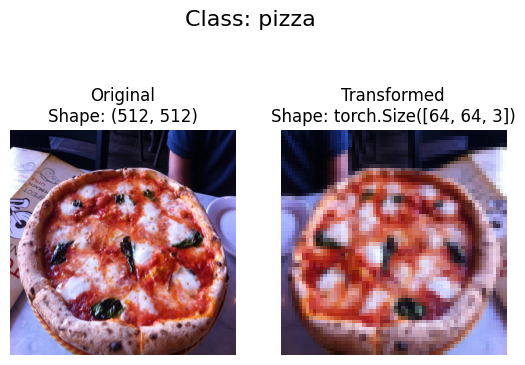

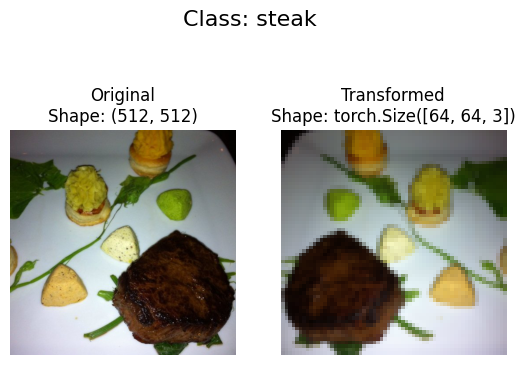

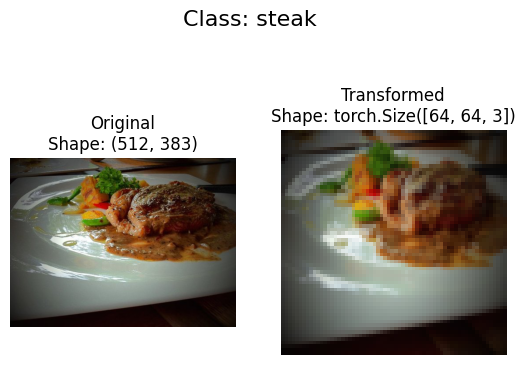

In [103]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """ Selects random images from a list of image paths, transforms them adn plots orignal vs transformed verison."""

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nShape: {f.size}")
      ax[0].axis(False)

      # Transform and plot image
      transformed_image = transform(f).permute(1,2,0) # Converting image shape for visualisation
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(
    image_paths = image_path_list,
    transform = data_transform,
    n = 3,
    seed = 42
)

###Loading Images to Tensors using ImageFolder

* Loading images using ImageFolder

In [104]:
# Using ImageFolder
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = data_transform,
    target_transform = None
)

test_data = datasets.ImageFolder(
    root = test_dir,
    transform = data_transform,
    target_transform = None
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [105]:
# Exploring data set attributes
class_names = train_data.classes
class_dict = train_data.class_to_idx
print(f"Class Names: {class_names} | Class Indices: {class_dict}")

Class Names: ['pizza', 'steak', 'sushi'] | Class Indices: {'pizza': 0, 'steak': 1, 'sushi': 2}


In [106]:
img, label = train_data[0][0], train_data[0][1]
img.shape, type(label)

(torch.Size([3, 64, 64]), int)

###Convert Dataset to Dataloader

* Create batch sizes for the data

In [107]:
BATCH_SIZE = 16
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(),
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(),
    shuffle = False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ff944faefb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff95c182980>)

In [108]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [109]:
img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([16, 3, 64, 64]), torch.Size([16]))

##Creating a Custom Data Set

* Able to load images from file
* Able to get class names
* Able to get classes as a dictionary
* Compatible with DataLoader functionality

### Helper function for class names and class dict

* Get class names using os.scandir() (Must be in standard img classification format)
* Raise an error if class names aren't found
* Turn class names into a dict and a list

In [110]:
target_directory = train_dir

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [111]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]] :
  """Finds the class folder names and return a list and dict of classes"""

  # Get class names
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Raise an error if classes not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes")

  # Create a dictionary of index lables
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [112]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###Create a custom data to replicate ImageFolder

* Subclass 'torch.utils.data.Dataset'

> Create Attributes:
* Image paths
* Transform** Classes and Class Indices

* Create a function to load images
* Overwrite the '__len()__' and '__getitem()__' methods


In [113]:
# Create a subclass

class ImageFolderCustom(Dataset):

  # Initialise
  def __init__(self, target_dir, transform = None):

    # Create class attributes

    # Get all image paths
    self.paths = list(Path(target_dir).glob("*/*.jpg"))

    # Setup transforms
    self.transform = transform

    # Create classes and class indices
    self.classes, self.class_to_idx = find_classes(target_dir)

  # Load images
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  # Overwrite __len()__
  def __len__(self) -> int:
    # Return total number of samples
    return len(self.paths)

  # Overwrite __getItem()__
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    # Return one sample of data -> data and label
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [114]:
# Create custom transforms

train_transform = transforms.Compose([
    # Resize Images to 64x64
    transforms.Resize(size=(64,64)),

    # Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),

    # Convert to torch tensor
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    # Resize Images to 64x64
    transforms.Resize(size=(64,64)),

    # Convert to torch tensor
    transforms.ToTensor()
])

In [115]:
train_data_custom = ImageFolderCustom(
    target_dir = train_dir,
    transform = train_transform
)

test_data_custom = ImageFolderCustom(
    target_dir = test_dir,
    transform = test_transform
)

In [116]:
len(train_data), len(train_data_custom)

(225, 225)

In [117]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [118]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

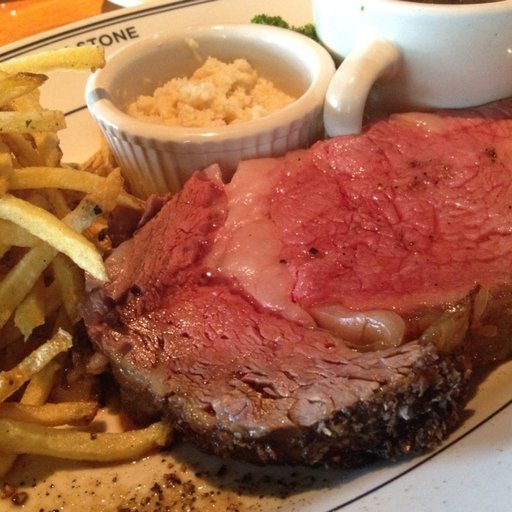

In [119]:
train_data_custom.load_image(5)

In [120]:
train_data_custom.__getitem__(5)

(tensor([[[0.8275, 0.8941, 0.9529,  ..., 0.8000, 0.8549, 0.8824],
          [0.9804, 0.9765, 0.9804,  ..., 0.7843, 0.7529, 0.7216],
          [0.9922, 0.9843, 0.9843,  ..., 0.6627, 0.6549, 0.6471],
          ...,
          [0.4824, 0.4392, 0.4941,  ..., 0.7529, 0.7529, 0.7529],
          [0.6431, 0.4863, 0.4275,  ..., 0.7569, 0.7569, 0.7608],
          [0.8157, 0.6941, 0.6353,  ..., 0.7529, 0.7569, 0.7608]],
 
         [[0.4745, 0.4549, 0.4941,  ..., 0.6667, 0.7294, 0.7647],
          [0.5569, 0.6314, 0.6039,  ..., 0.7451, 0.7176, 0.6784],
          [0.5843, 0.6039, 0.5961,  ..., 0.6706, 0.6471, 0.6235],
          ...,
          [0.2431, 0.2000, 0.2667,  ..., 0.7804, 0.7882, 0.7882],
          [0.3961, 0.2627, 0.2039,  ..., 0.7882, 0.7922, 0.7961],
          [0.5804, 0.4627, 0.4078,  ..., 0.7843, 0.7922, 0.7961]],
 
         [[0.2196, 0.1569, 0.1529,  ..., 0.5451, 0.5882, 0.6196],
          [0.1882, 0.2902, 0.1882,  ..., 0.6745, 0.6471, 0.6078],
          [0.1490, 0.1843, 0.1569,  ...,

###Display random images from the custom data set

In [121]:
def display_random_images(dataset: torch.utils.data.Dataset, classes: List[str]=None, n: int=10, display_shape: bool=True, seed: int=None):
  
  # Adjust display if n is too high
  if n > 10 :
    n = 10
    display_shape = False

  # Set seed
  if seed:
    random.seed(seed)

  # Get random sample indices
  random_sample_idx = random.sample(range(len(dataset)), k=n)

  # Setup plot
  plt.figure(figsize=(16,8))

  # Plot using MatplotLib
  for i, target_sample in enumerate(random_sample_idx):
    target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

    target_image_adjust = target_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(target_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[target_label]}"
      if display_shape:
        title = title + f"\nshape: {target_image_adjust.shape}"
    plt.title(title)

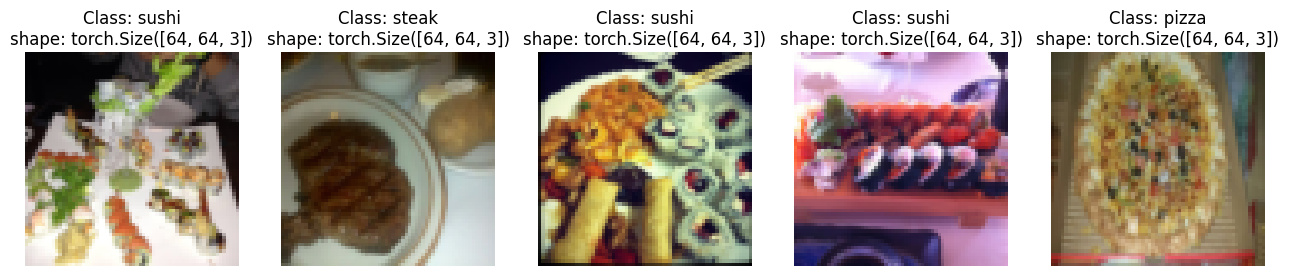

In [122]:
display_random_images(train_data_custom, n=5, classes=class_names, seed=10)

###Convert to Data Loaders

In [123]:
BATCH_SIZE = 32

train_dataloader_custom = DataLoader (
    dataset = train_data_custom,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(),
    shuffle = True
)

test_dataloader_custom = DataLoader (
    dataset = test_data_custom,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(),
    shuffle = False
)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7ff95c157a00>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff97d4e7d60>)

In [124]:
train_images_batch, train_labels_batch = next(iter(train_dataloader_custom))

train_images_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

##Data Augmentation

In [138]:
# Create transforms with data augmentation

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

##Create CNN Models

###Create common stuff - transform, datasets, dataloader, train_step, test_step and overall train functions

In [126]:
# Create a transform for TinyVGG
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [140]:
# Load and transform data
train_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)

train_data_augment = datasets.ImageFolder(
    root = train_dir,
    transform = train_transform_trivial
)

test_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)

# Create a DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    dataset = train_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

train_dataloader_augmented = DataLoader(
    dataset = train_data_augment,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)

In [128]:
# Train step function
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer):
  
  model.train()

  train_loss, train_acc = 0,0

  for batch, (X,y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)

    # Forward Pass
    y_pred = model(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backward propogation
    loss.backward()

    # Gradient descent
    optimizer.step()

    # Calculate Accuracy
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [129]:
# Test step function

def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module):
  
  model.eval()

  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):

      X, y = X.to(device), y.to(device)

      # Forward Pass
      test_pred_logits = model(X)

      # Calculate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Caluclate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)

  # Adjust metric for loss and acc
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [130]:
# Create a combined model training and testing function

def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5) :

    # Create an empty results directory
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # Loop through training and testing steps for all epochs
    for epoch in tqdm(range(epochs)) :
      train_loss, train_acc = train_step(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer)
      test_loss, test_acc = test_step(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn)
      
    # Print out data
      print(
              f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | "
              f"train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | "
              f"test_acc: {test_acc:.4f}"
          )
    
      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

    # Return the results at end of the epoch
    return results

###MODEL 0 - TinyVGG without augmentation

In [131]:
# Create model 0 class

class TinyVGG(nn.Module):
  
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13, out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [132]:
# Create model 0

torch.manual_seed(42)

model_sample = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(class_names)
)

model_sample.to(device)
summary(model_0, input_size= [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [133]:
# Test model 0

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.to(device), label_batch.to(device)
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [134]:
model_sample(image_batch.to(device))

tensor([[ 2.4292e-02, -4.2148e-03,  9.1331e-03],
        [ 2.0496e-02, -7.8159e-04,  8.4746e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2778e-02, -2.7411e-03,  1.1190e-02],
        [ 1.8335e-02,  1.8651e-04,  6.0225e-03],
        [ 2.1921e-02, -1.7709e-03,  8.1947e-03],
        [ 2.2924e-02, -1.4935e-03,  1.0275e-02],
        [ 2.0078e-02,  4.5732e-04,  1.0555e-02],
        [ 2.0918e-02,  1.2968e-04,  8.8678e-03],
        [ 1.9509e-02,  7.8303e-04,  8.2038e-03],
        [ 1.9475e-02, -2.1625e-03,  9.9487e-03],
        [ 1.9281e-02, -5.5920e-03,  1.2914e-02],
        [ 2.0930e-02, -4.5746e-03,  8.4647e-03],
        [ 2.2065e-02, -4.6434e-03,  1.2666e-02],
        [ 2.0798e-02,  1.9524e-04,  9.1937e-03],
        [ 2.1513e-02, -6.1432e-04,  7.3849e-03],
        [ 2.4599e-02, -3.2342e-03,  8.6987e-03],
        [ 1.9834e-02, -3.9071e-03,  9.8740e-03],
        [ 2.1272e-02, -1.6094e-03,  9.5620e-03],
        [ 1.8849e-02, -4.1510e-04,  8.4803e-03],
        [ 2.1703e-02

In [135]:
# Train Model 0

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Hyperparameter
NUM_EPOCHS = 20
INPUT_SHAPE = 3
HIDDEN_UNITS = 10
OUTPUT_SHAPE = len(train_data.classes)
LR = 0.001

# Create an instance of model 0
model_0 = TinyVGG(input_shape = INPUT_SHAPE,
                  hidden_units = HIDDEN_UNITS,
                  output_shape = OUTPUT_SHAPE)

model_0.to(device)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = LR)

# Start the timer
start_time = timer()

# Train model 0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

# End Timer
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0955 | test_acc: 0.4492
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3320 | test_loss: 1.0826 | test_acc: 0.4023
Epoch: 3 | train_loss: 1.0862 | train_acc: 0.4922 | test_loss: 1.0783 | test_acc: 0.4336
Epoch: 4 | train_loss: 1.0826 | train_acc: 0.4102 | test_loss: 1.0543 | test_acc: 0.5430
Epoch: 5 | train_loss: 1.0631 | train_acc: 0.4141 | test_loss: 1.0327 | test_acc: 0.4570
Epoch: 6 | train_loss: 1.0214 | train_acc: 0.4570 | test_loss: 0.9674 | test_acc: 0.4844
Epoch: 7 | train_loss: 0.9661 | train_acc: 0.4258 | test_loss: 0.9051 | test_acc: 0.5273
Epoch: 8 | train_loss: 0.9269 | train_acc: 0.5859 | test_loss: 0.9083 | test_acc: 0.5703
Epoch: 9 | train_loss: 0.9093 | train_acc: 0.6133 | test_loss: 0.8716 | test_acc: 0.6094
Epoch: 10 | train_loss: 0.9914 | train_acc: 0.4648 | test_loss: 0.8383 | test_acc: 0.6172
Epoch: 11 | train_loss: 0.8435 | train_acc: 0.5273 | test_loss: 0.8235 | test_acc: 0.6172
Epoch: 12 | train_l

In [165]:
# Plotting loss curves

def plot_loss_curves(results: Dict[str, List[float]], model_name: str):

  # Get loss values of the results dictionary
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get accuracy
  acc = results["train_acc"]
  test_acc = results["test_acc"]
  
  # Get number of epochs
  epochs = range(len(results["train_loss"]))

  # Plot the loss
  
  plt.figure(figsize=(15,4))
  plt.suptitle(model_name)

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

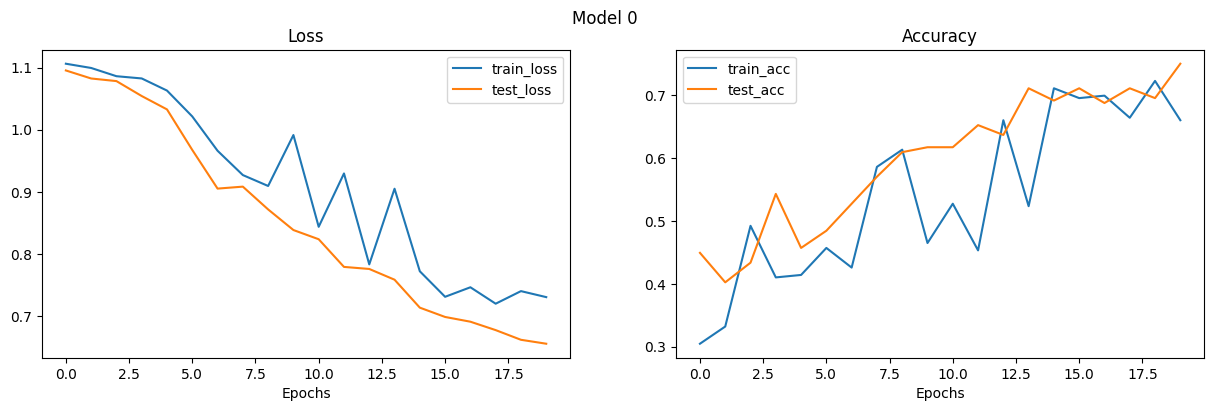

In [167]:
plot_loss_curves(model_0_results, "Model 0")

###MODEL 1 TinyVGG with Data Augmentation

In [141]:
# Train Model 0 with augmented data

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Hyperparameter
NUM_EPOCHS = 20
INPUT_SHAPE = 3
HIDDEN_UNITS = 10
OUTPUT_SHAPE = len(train_data.classes)
LR = 0.001

# Create an instance of model 0
model_1 = TinyVGG(input_shape = INPUT_SHAPE,
                  hidden_units = HIDDEN_UNITS,
                  output_shape = OUTPUT_SHAPE)

model_1.to(device)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = LR)

# Start the timer
start_time = timer()

# Train model 1
model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

# End Timer
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1069 | train_acc: 0.2969 | test_loss: 1.0966 | test_acc: 0.3516
Epoch: 2 | train_loss: 1.1021 | train_acc: 0.3047 | test_loss: 1.0867 | test_acc: 0.4023
Epoch: 3 | train_loss: 1.0917 | train_acc: 0.4297 | test_loss: 1.0885 | test_acc: 0.3945
Epoch: 4 | train_loss: 1.0923 | train_acc: 0.3164 | test_loss: 1.0793 | test_acc: 0.4492
Epoch: 5 | train_loss: 1.0865 | train_acc: 0.3672 | test_loss: 1.0727 | test_acc: 0.4258
Epoch: 6 | train_loss: 1.0683 | train_acc: 0.5273 | test_loss: 1.0523 | test_acc: 0.5234
Epoch: 7 | train_loss: 1.0766 | train_acc: 0.3516 | test_loss: 1.0258 | test_acc: 0.5195
Epoch: 8 | train_loss: 1.0891 | train_acc: 0.3438 | test_loss: 1.0074 | test_acc: 0.3906
Epoch: 9 | train_loss: 1.0809 | train_acc: 0.4492 | test_loss: 1.0043 | test_acc: 0.4883
Epoch: 10 | train_loss: 1.0926 | train_acc: 0.3477 | test_loss: 1.0683 | test_acc: 0.3438
Epoch: 11 | train_loss: 1.0531 | train_acc: 0.4844 | test_loss: 1.0246 | test_acc: 0.5078
Epoch: 12 | train_l

###Comparing Results

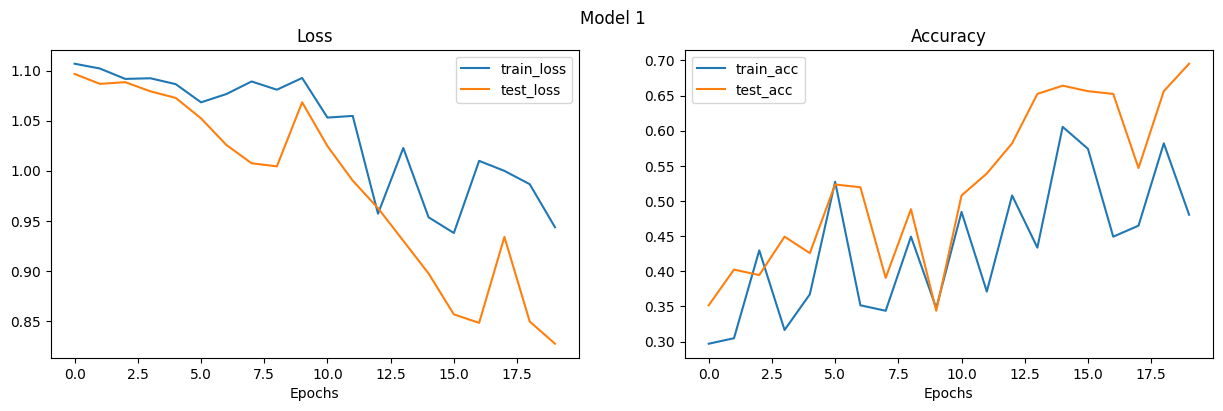

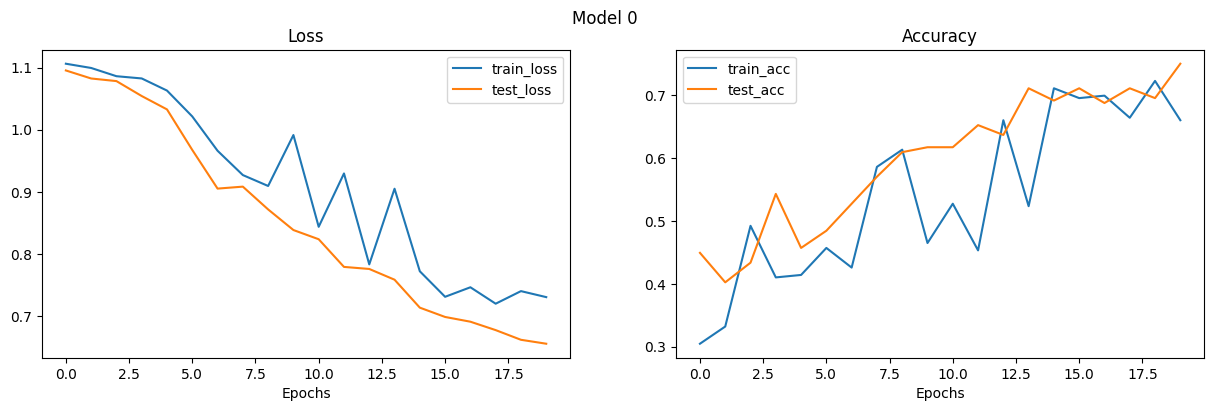

In [168]:
plot_loss_curves(model_1_results,"Model 1")
plot_loss_curves(model_0_results,"Model 0")

In [171]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

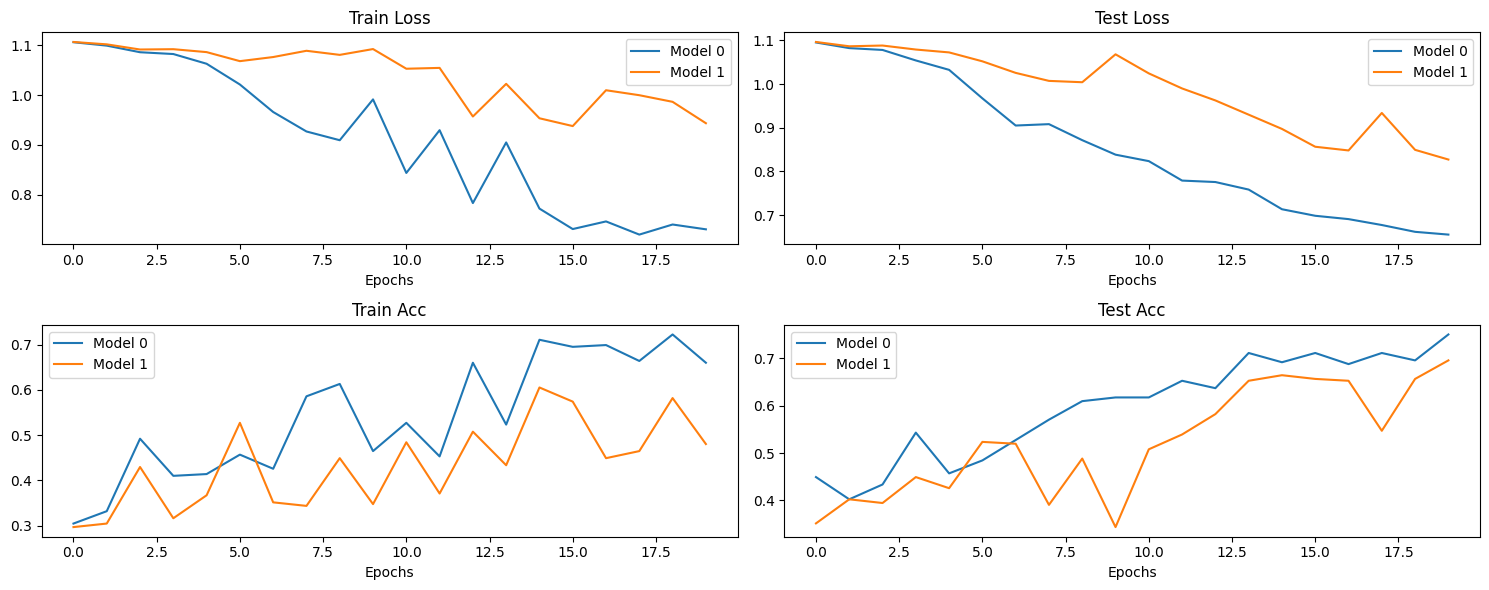

In [179]:
plt.figure(figsize=(15,6))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["train_loss"], label = "Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend();

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["test_loss"], label = "Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend();

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["train_acc"], label = "Model 1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend();

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["test_acc"], label = "Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend();

plt.tight_layout()
plt.show()